In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

In [2]:
df = pd.read_csv('Assets/Earthquake database 01011677 to 11042025.csv', index_col='DATE', parse_dates=True)

### Yearly earthquake activity analysis

Creating a figure to visualize the yearly earthqake activity, where we can observe:
1. The number of earthquakes per year
2. The biggest magnitude per year
3. The average magnitude per year and the evolution accross years

Conclusions will be found below the plot.

In [4]:
yearly_mw = df['Mw'].resample('YE')
yearly_earthq = yearly_mw.agg(average_Mw='mean', std_Mw='std', max_Mw='max', count='count').round(2)
yearly_earthq.index = yearly_earthq.index.year

# At the following line, the year can be changed to extend the time span.
start_year = 1985
yearly_mask = yearly_earthq.index > start_year - 1

yearly_earthq = yearly_earthq[yearly_mask].reset_index()

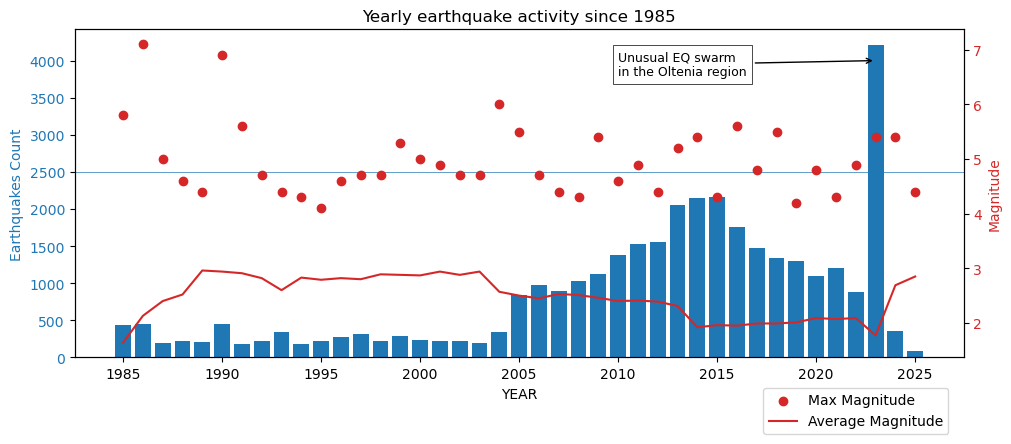

In [5]:
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')

date = yearly_earthq['DATE']
count = yearly_earthq['count']
average_mw = yearly_earthq['average_Mw']
max_mw = yearly_earthq['max_Mw']

ax.set(title=f'Yearly earthquake activity since {start_year}', xlabel='YEAR')
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Creating the bar lines for the count of the earthquakes
color = 'tab:blue'
ax.bar(x=date, height=count, color=color)
ax.set_ylabel('Earthquakes Count', color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.axhline(y=2500, color=color, linestyle='-', linewidth=0.5)

# Placing annotation relative to the 2023 spike, due to unusual eq activity in the Oltenia region.
ax.annotate('Unusual EQ swarm \nin the Oltenia region',
            xy=(2023, 4000), xytext=(2010, 3800),
            size=9,
            bbox=dict(facecolor='none', linewidth=0.5),
            arrowprops=dict(arrowstyle='->'),
           )

# Creating a line for the average and a scatter plot for the strongest earthquakes per year.
color = 'tab:red'
ax2 = ax.twinx()
ax2.set_ylabel('Magnitude', color=color)
average_plot = ax2.plot(date, average_mw, c=color, label='Average Magnitude')[0]
max_scat = ax2.scatter(date, max_mw, color=color, label='Max Magnitude')

ax2.tick_params(axis='y', labelcolor=color)

fig.legend(handles=[max_scat, average_plot], loc='outside lower center',
           bbox_to_anchor=(0.85, -0.09)
          )

plt.show()

#### **Conclusions** that can be drawn from this analysis:
1. **Technology development**: Romania did not have the necessary equipment to observe smaller earthquakes and only starting with 2005 there was an investment in equipment and technology. This conclusion is supported by the public information on the INFP (The National Institute for Research and Development in Earth Physics) site as well. <br>
    (If the time span is extended from 1985 to earthquakes starting from 1970, then we can observe two waves of technological development, one after 1977 and the second after 2005.)
2. **Magnitude range**: The strongest earthquakes per year will stay in the range 4-6 Mw, and any stronger earthquake will be an exception. <br>
    (For an analysis of earthquakes above 6 Mw, see the module on "Major earthquakes in history" where the clustering of the strongest earthquakes accross time is explained.)
3. **Average magnitude**: There is a decrease in the average intensity of earthquakes starting with 2005, however this is strictly related to the increased capabilities of earthqake observation.<br>
   From 2005 onwards, there is a decrease in earthquake strength, with only the year 2004 having a slight increase. However, the standard deviation is only 0.57 Mw, not different from the trend. So this is also strictly related to the amount of earthquakes that happened that year (lower than previous years).